In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, r2_score
import plotly.express as px
import math
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Data4.csv")
df = df.drop("Sl.", axis=1)
df.head()

,x1,x2,x3,y
0,0.1,0.311089,0.390541,14.705876
1,0.2,0.639066,1.389918,26.585100
2,0.3,0.840228,1.939903,36.791509
3,0.4,1.299710,2.153009,34.090806
4,0.5,0.941784,0.945136,31.118089


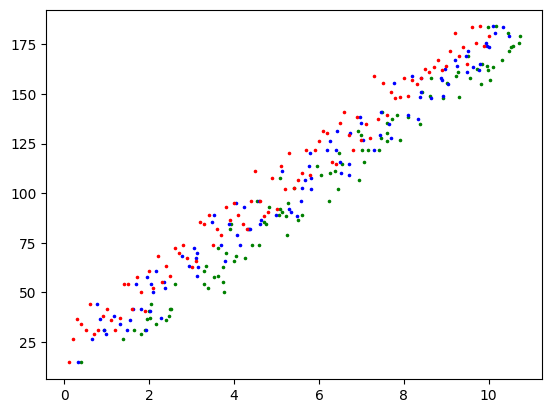

In [ ]:
x_list3 = [float(item) for item in list(df['x1'])]
x_list2 = [float(item) for item in list(df['x2'])]
x_list1 = [float(item) for item in list(df['x3'])]

y_value = [float(item) for item in list(df['y'])]

plt.scatter(x_list1, y_value, s=2.5, color="green")
plt.scatter(x_list2, y_value, s=2.5, color="blue")
plt.scatter(x_list3, y_value, s=2.5, color="red")
plt.show()

In [ ]:
y_list = [float(i) for i in df["y"]]
x_list = []

# Extracting all the experiments from the dataset

for i in range(1, 4):
  x_list.append([float(i) for i in df[f"x{i}"]])

x_list.append([float(1) for i in df["x1"]])

In [ ]:
# Making x_i list
x_lst = []
for i in range(100):
  value = []
  for j in range(4):
    value.append(x_list[j][i])

  x_lst.append(value)


In [ ]:
# result_array = np.array(x_lst).reshape(-1, 1)
x_vector = [] # This will be usde for making array.
for row in x_lst:
  result_array = np.array(row).reshape(-1, 1)
  x_vector.append(result_array)

x_T_vector = []
for row in x_vector:
  value = row.T
  x_T_vector.append(value)


In [ ]:
# multiplying x and a transpose and adding them for getting the desired matrix
matrix = np.zeros((4, 4))

# np.dot(matrix_a, matrix_b)
for i in range(len(df)):
  m = np.dot(x_vector[i], x_T_vector[i])
  matrix += m

matrix_inverse = np.linalg.inv(matrix)
matrix_inverse

array([[ 0.17232455, -0.13967998, -0.03093789,  0.0911748 ],
       [-0.13967998,  0.1444378 , -0.00671043, -0.05419394],
       [-0.03093789, -0.00671043,  0.03917373, -0.04402717],
       [ 0.0911748 , -0.05419394, -0.04402717,  0.11668684]])

In [ ]:

xy_vector = []

for col in range(len(df.columns)):

    var = []
    for val in range(len(df)):
        value = x_list[col][val] * y_list[val]
        var.append(value)

    xy_vector.append(np.sum(var))

xy_vector

[66074.55450871799, 71379.27277894279, 76343.57296321742, 10441.80045016]

In [ ]:
# Now time to get the coefficient vector
w = np.dot(matrix_inverse, xy_vector)
w
predicted_Y = []
for i in range(100):
  r1 = w[3] + w[0] * x_list[0][i] + w[1] * x_list[1][i] + w[2] * x_list[2][i]
  predicted_Y.append(r1)

w

array([ 6.13243763,  2.39226554,  7.74681038, 13.23947782])

In [ ]:
mae = mean_absolute_error(y_true=y_list, y_pred=predicted_Y)
mse = mean_squared_error(y_true=y_list, y_pred=predicted_Y)
rmse = root_mean_squared_error(y_true=y_list, y_pred=predicted_Y)
r_square = r2_score(y_list, predicted_Y)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r_square:",r_square)

MAE: 5.155505630375659
MSE: 34.62048082924357
RMSE: 5.883917133104745
r_square: 0.9841749058943147


Code provided in the assignment

In [ ]:
X = df[['x1', 'x2', 'x3']]
Y = df['y']


In [ ]:
regr = LinearRegression()

regr.fit(X, Y)
print("Slopes: ",regr.coef_)
print("Intercept: ",regr.intercept_)

Slopes:  [6.13243763 2.39226554 7.74681038]
Intercept:  13.239477824445359


In [ ]:
predicted_Y_SK = []
for i in range(100):
  r1 = 13.239477824445359 + 6.13243763 * x_list[0][i] + 2.39226554 * x_list[1][i] + 7.74681038 * x_list[2][i]
  predicted_Y_SK.append(r1)

In [ ]:
mae = mean_absolute_error(y_true=y_list, y_pred=predicted_Y_SK)
mse = mean_squared_error(y_true=y_list,  y_pred=predicted_Y_SK)
rmse = root_mean_squared_error(y_true=y_list, y_pred=predicted_Y_SK)
r_square = r2_score(y_list, predicted_Y_SK)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r_square:",r_square)

MAE: 5.15550562646378
MSE: 34.62048082924356
RMSE: 5.883917133104745
r_square: 0.9841749058943147


Gradient Descent


In [ ]:
def gradient_descent(X1, X2, X3, Y, learning_rate, epoch):

    n = len(X1)

    # starting from 1 for each values and then descending to a saturation
    c = 0; m1 = 0; m2 = 0; m3 = 0
    for _ in range(epoch):

        sum = 0
        for i in range(n):
            value = c + m1*X1[i] +  m2*X2[i] +  m3*X3[i] - Y[i]
            sum = sum + value
        c_new = c - learning_rate * ((2/n) * sum)
        c = c_new

        sum = 0
        for i in range(n):
            value = c*X1[i] + m1*X1[i]*X1[i] + m2*X2[i]*X1[i] + m3*X3[i]*X1[i] - Y[i]*X1[i]
            sum = sum + value
        m1_new = m1 - learning_rate * ((2/n) * sum)
        m1 = m1_new

        sum = 0
        for i in range(n):
            value = c*X2[i] + m1*X1[i]*X2[i] + m2*X2[i]*X2[i] + m3*X3[i]*X2[i] - Y[i]*X2[i]
            sum = sum + value
        m2_new = m2 - learning_rate * ((2/n) * sum)
        m2 = m2_new

        sum = 0
        for i in range(n):
            value = c*X3[i] + m1*X1[i]*X3[i] + m2*X2[i]*X3[i] + m3*X3[i]*X3[i] - Y[i]*X3[i]
            sum = sum + value
        m3_new = m3 - learning_rate * ((2/n) * sum)
        m3 = m3_new

    return (m1, m2, m3, c)

result = gradient_descent(x_list[0], x_list[1], x_list[2], y_list, 0.01, 6000)
print(result)


(6.100823243679714, 2.415559644845767, 7.75560038149159, 13.215822857145014)


In [ ]:
predicted_Y_GD = []
for i in range(100):
  r1 = 13.215822857145014 + 6.100823243679714 * x_list[0][i] + 2.415559644845767 * x_list[1][i] + 7.75560038149159 * x_list[2][i]
  predicted_Y_GD.append(r1)

In [ ]:
mae = mean_absolute_error(y_true=y_list, y_pred=predicted_Y_GD)
mse = mean_squared_error(y_true=y_list,  y_pred=predicted_Y_GD)
rmse = root_mean_squared_error(y_true=y_list, y_pred=predicted_Y_GD)


print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 5.155292760995812
MSE: 34.62054588549113
RMSE: 5.883922661413144
